In [1]:
# importing necessary libraries and configurations
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from fbprophet.plot import plot_plotly

plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
# loading the data set
df = pd.read_csv("df_05.csv")

In [3]:
# data cleaning and indexing 
df.drop("zip_code", axis=1, inplace=True)

df.occurred_date_time = df.occurred_date_time.astype("datetime64")
df.set_index(["occurred_date_time"], inplace=True)
df.sort_index(inplace=True)

# examining the new data frame
display(df.head())
display(df.tail())

highest_offense_description family_violence  \
occurred_date_time                                                
2003-01-01 00:01:00         BURGLARY OF VEHICLE               N   
2003-01-01 01:25:00         PUBLIC INTOXICATION               N   
2003-01-01 02:08:00                         DWI               N   
2003-01-01 02:44:00                         DWI               N   
2003-01-01 02:45:00         ASSAULT WITH INJURY               N   

                        report_date_time                 location_type  \
occurred_date_time                                                       
2003-01-01 00:01:00  2003-01-02 14:54:00         PARKING LOTS / GARAGE   
2003-01-01 01:25:00  2003-01-01 01:25:00         PARKING LOTS / GARAGE   
2003-01-01 02:08:00  2003-01-01 02:08:00  STREETS / HWY / ROAD / ALLEY   
2003-01-01 02:44:00  2003-01-01 03:07:00  STREETS / HWY / ROAD / ALLEY   
2003-01-01 02:45:00  2003-01-01 02:45:00              RESIDENCE / HOME   

                                     address  council_district apd_sector  \
occurred_date_time                                                          
2003-01-01 00:01:00             2900 COLE ST               9.0         BA   
2003-01-01 01:25:00        2021 GUADALUPE ST               9.0         BA   
2003-01-01 02:08:00          3500 N IH 35 SB               9.0         BA   
2003-01-01 02:44:00  2000 BLOCK GUADALUPE ST               9.0         BA   
2003-01-01 02:45:00       2728 RIO GRANDE ST               9.0         BA   

                    apd_district clearance_status       clearance_date  \
occurred_date_time                                                       
2003-01-01 00:01:00            1                N                  NaN   
2003-01-01 01:25:00            1                C  2003-01-01 00:00:00   
2003-01-01 02:08:00            1                C  2003-01-01 00:00:00   
2003-01-01 02:44:00            1                C  2003-02-11 00:00:00   
2003-01-01 02:45:00            3                O  2003-01-09 00:00:00   

                      latitude  longitude  year  month  week  day  hour  
occurred_date_time                                                       
2003-01-01 00:01:00  30.287795 -97.725294  2003      1     1    1     0  
2003-01-01 01:25:00  30.283460 -97.741275  2003      1     1    1     1  
2003-01-01 02:08:00  30.292694 -97.721123  2003      1     1    1     2  
2003-01-01 02:44:00  30.282842 -97.742397  2003      1     1    1     2  
2003-01-01 02:45:00  30.293177 -97.744674  2003      1     1    1     2

highest_offense_description family_violence  \
occurred_date_time                                                
2020-12-10 15:05:00            THEFT OF BICYCLE               N   
2020-12-10 17:08:00                  AUTO THEFT               N   
2020-12-10 20:00:00           CRIMINAL MISCHIEF               N   
2020-12-10 20:14:00          TERRORISTIC THREAT               N   
2020-12-10 20:22:00         DISTURBANCE - OTHER               N   

                        report_date_time           location_type  \
occurred_date_time                                                 
2020-12-10 15:05:00  2020-12-11 13:45:00        RESIDENCE / HOME   
2020-12-10 17:08:00  2020-12-10 17:08:00   PARKING LOTS / GARAGE   
2020-12-10 20:00:00  2020-12-11 12:13:00        RESIDENCE / HOME   
2020-12-10 20:14:00  2020-12-10 20:14:00  GAS / SERVICE STATIONS   
2020-12-10 20:22:00  2020-12-10 21:11:00        RESIDENCE / HOME   

                                address  council_district apd_sector  \
occurred_date_time                                                     
2020-12-10 15:05:00       2200 PEARL ST               9.0         BA   
2020-12-10 17:08:00       3203 HELMS ST               9.0         BA   
2020-12-10 20:00:00       2908 PEARL ST               9.0         BA   
2020-12-10 20:14:00  2400 RIO GRANDE ST               9.0         BA   
2020-12-10 20:22:00       406 E 30TH ST               9.0         BA   

                    apd_district clearance_status       clearance_date  \
occurred_date_time                                                       
2020-12-10 15:05:00            2                N  2020-12-11 00:00:00   
2020-12-10 17:08:00            1                N  2020-12-11 00:00:00   
2020-12-10 20:00:00            3              NaN                  NaN   
2020-12-10 20:14:00            3              NaN                  NaN   
2020-12-10 20:22:00            1              NaN                  NaN   

                      latitude  longitude  year  month  week  day  hour  
occurred_date_time                                                       
2020-12-10 15:05:00  30.285627 -97.746715  2020     12    50   10    15  
2020-12-10 17:08:00  30.296330 -97.735189  2020     12    50   10    17  
2020-12-10 20:00:00  30.297936 -97.746204  2020     12    50   10    20  
2020-12-10 20:14:00  30.288185 -97.744922  2020     12    50   10    20  
2020-12-10 20:22:00  30.292331 -97.734539  2020     12    50   10    20

In [4]:
# Creating violent crime and murder data frames for analysis
df_viol = df.query(
    'highest_offense_description == ["AGG ASSAULT", "AGG ROBBERY/DEADLY WEAPON", "CAPITAL MURDER", "MURDER", "RAPE"]'
)
df_viol_mur = df.query('highest_offense_description == ["MURDER", "CAPITAL MURDER"]')

# Annual overall crime (2017-present)
df_17 = df[df.year == 2017]
df_18 = df[df.year == 2018]
df_19 = df[df.year == 2019]
df_20 = df[df.year == 2020]

# Annual violent crime (2017-present)
df_viol_17 = df_viol[df_viol.year == 2017]
df_viol_18 = df_viol[df_viol.year == 2018]
df_viol_19 = df_viol[df_viol.year == 2019]
df_viol_20 = df_viol[df_viol.year == 2020]

# Annual murders (2017-present)
df_viol_mur_17 = df_viol_mur[df_viol_mur.year == 2017]
df_viol_mur_18 = df_viol_mur[df_viol_mur.year == 2018]
df_viol_mur_19 = df_viol_mur[df_viol_mur.year == 2019]
df_viol_mur_20 = df_viol_mur[df_viol_mur.year == 2020]

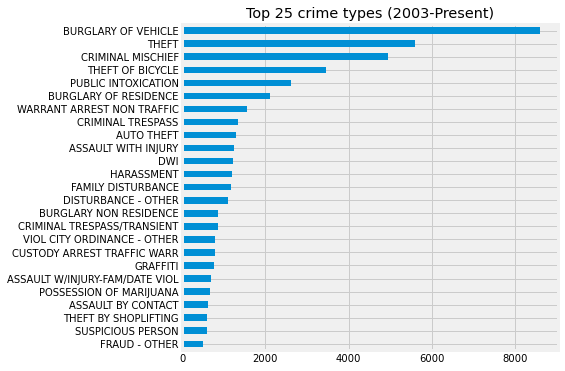

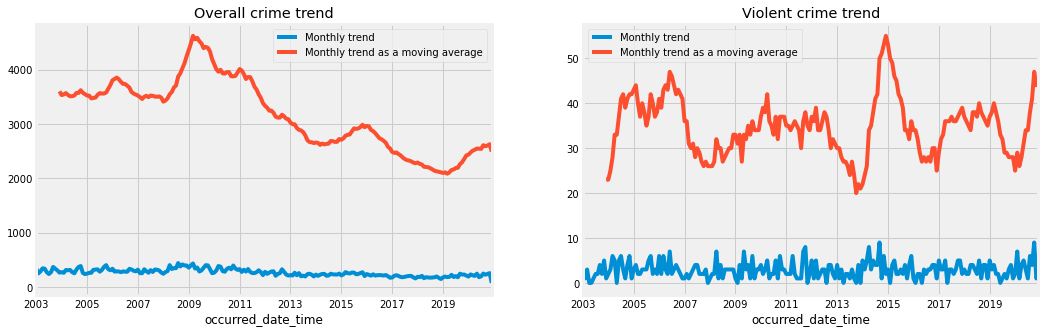

In [5]:
# Top 25 crime types
df.highest_offense_description.value_counts().head(25).sort_values().plot.barh(
    figsize=(6, 6), title="Top 25 crime types (2003-Present)"
)
plt.show()

fig, axs = plt.subplots(ncols=2, figsize=(16, 5))
df.resample("M").size().plot(ax=axs[0])
df.resample("M").size().rolling(12).sum().plot(title="Overall crime trend", ax=axs[0])
axs[0].legend(["Monthly trend", "Monthly trend as a moving average"])
df_viol.resample("M").size().plot(ax=axs[1])
df_viol.resample("M").size().rolling(12).sum().plot(
    title="Violent crime trend", ax=axs[1]
)
axs[1].legend(["Monthly trend", "Monthly trend as a moving average"])
plt.show()

Overalln crime 2017-present


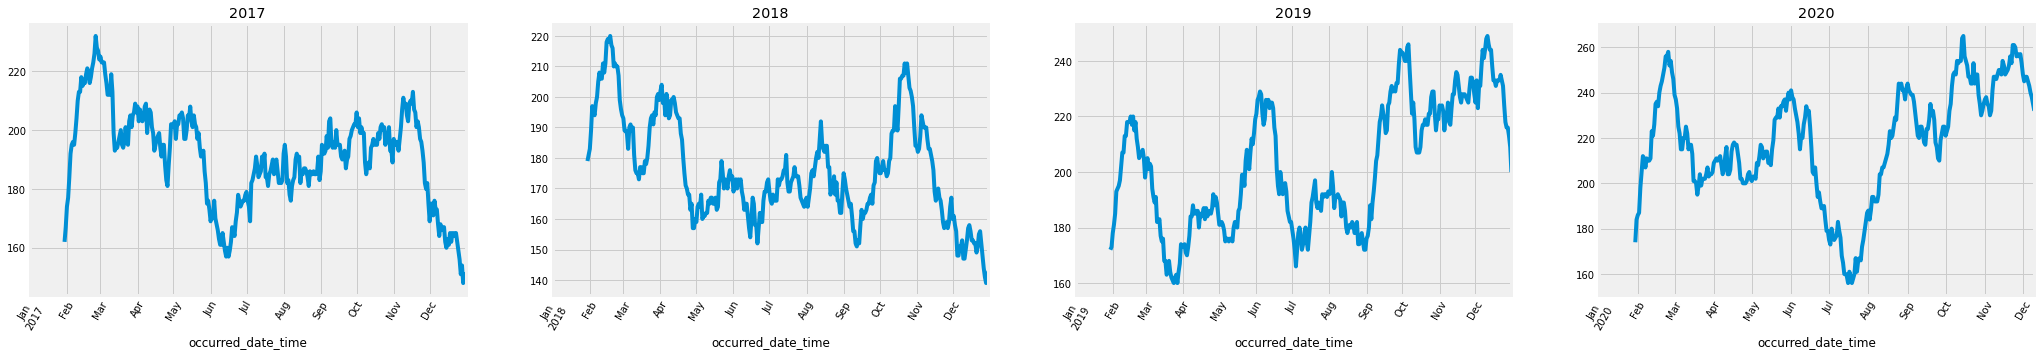

Violent crime 2017-present


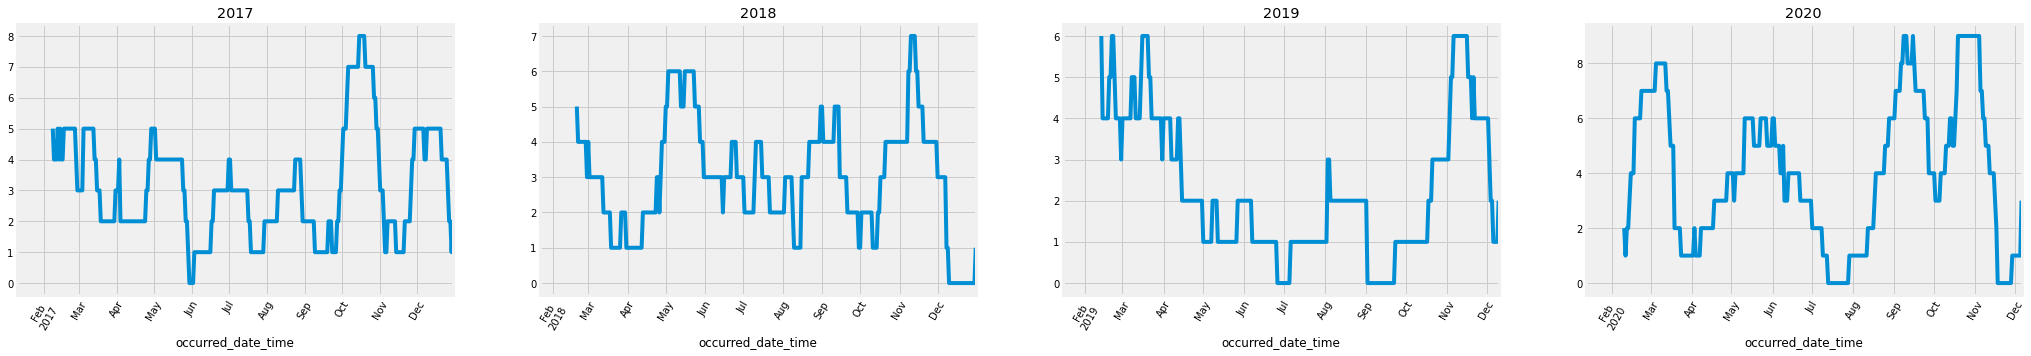

In [6]:
print("===========================")
print("Overalln crime 2017-present")
print("===========================")
fig, axs = plt.subplots(ncols=4, figsize=(32, 5))
df_17.resample("D").size().rolling(30).sum().plot(rot=60, title="2017", ax=axs[0])
df_18.resample("D").size().rolling(30).sum().plot(rot=60, title="2018", ax=axs[1])
df_19.resample("D").size().rolling(30).sum().plot(rot=60, title="2019", ax=axs[2])
df_20.resample("D").size().rolling(30).sum().plot(rot=60, title="2020", ax=axs[3])
plt.show()

print("==========================")
print("Violent crime 2017-present")
print("==========================")
fig, axs = plt.subplots(ncols=4, figsize=(32, 5))
df_viol_17.resample("D").size().rolling(30).sum().plot(rot=60, title="2017", ax=axs[0])
df_viol_18.resample("D").size().rolling(30).sum().plot(rot=60, title="2018", ax=axs[1])
df_viol_19.resample("D").size().rolling(30).sum().plot(rot=60, title="2019", ax=axs[2])
df_viol_20.resample("D").size().rolling(30).sum().plot(rot=60, title="2020", ax=axs[3])
plt.show()

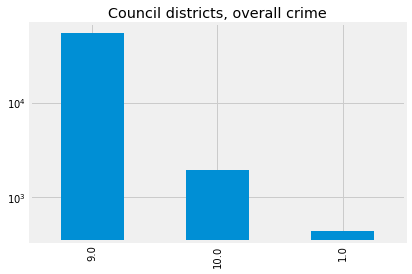

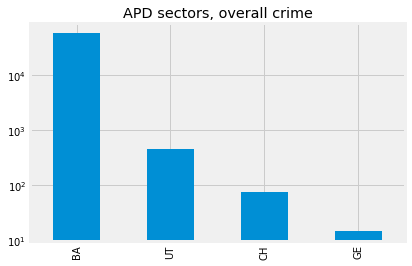

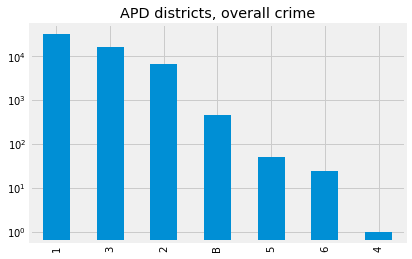

In [7]:
# Showing overall crime rates by council districts, APD districts, and sectors
df.council_district.value_counts().plot.bar(
    title="Council districts, overall crime", logy=True
)
plt.show()

df.apd_sector.value_counts().plot.bar(title="APD sectors, overall crime", logy=True)
plt.show()

df.apd_district.value_counts().plot.bar(title="APD districts, overall crime", logy=True)
plt.show()

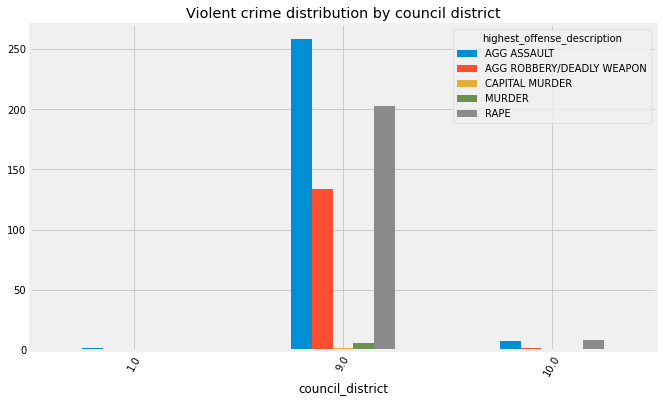

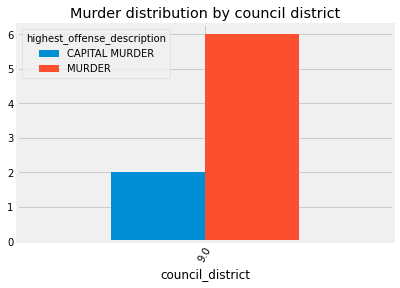

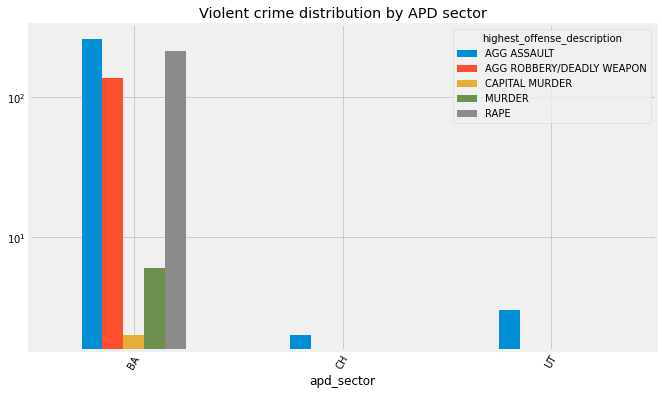

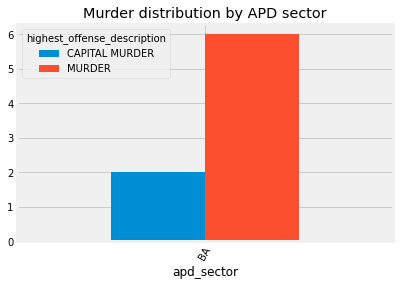

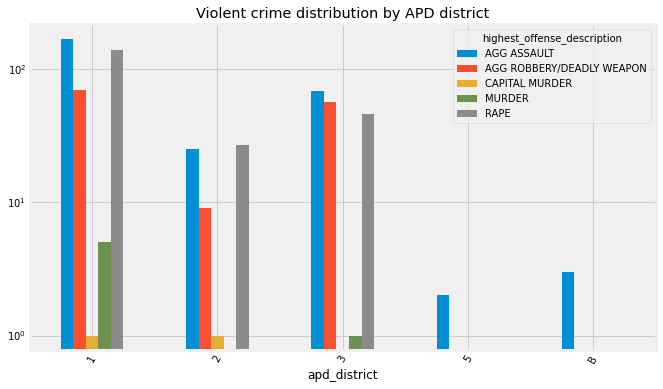

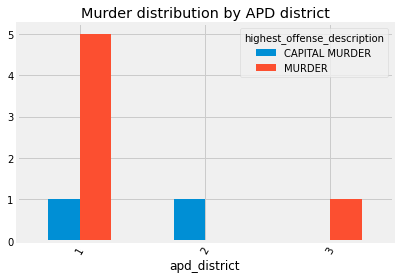

In [8]:
pd.crosstab(df_viol.council_district, df_viol.highest_offense_description).plot.bar(
    rot=60, figsize=(10, 6), title="Violent crime distribution by council district"
)
plt.show()

pd.crosstab(
    df_viol_mur.council_district, df_viol_mur.highest_offense_description
).plot.bar(rot=60, title="Murder distribution by council district")
plt.show()

pd.crosstab(df_viol.apd_sector, df_viol.highest_offense_description).plot.bar(
    rot=60, figsize=(10, 6), logy=True, title="Violent crime distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol_mur.apd_sector, df_viol_mur.highest_offense_description).plot.bar(
    rot=60, title="Murder distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol.apd_district, df_viol.highest_offense_description).plot.bar(
    rot=60,
    figsize=(10, 6),
    logy=True,
    title="Violent crime distribution by APD district",
)
plt.show()

pd.crosstab(df_viol_mur.apd_district, df_viol_mur.highest_offense_description).plot.bar(
    rot=60, title="Murder distribution by APD district"
)
plt.show()

highest_offense_description                     AGG ASSAULT  \
location_type                                                 
ABANDONED/CONDEMNED STRUCTURE                             1   
BANKS / SAVINGS & LOAN                                    0   
BAR / NIGHT CLUB                                          6   
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE                      3   
COMMERCIAL / OFFICE BUILDING                              4   
CONSTRUCTION SITE                                         3   
CONVENIENCE STORE                                         4   
DEPARTMENT / DISCOUNT STORE                               1   
DRUG STORE / DR. OFFICE / HOSPITAL                        9   
FIELD / WOODS                                             2   
GAS / SERVICE STATIONS                                    2   
GOVERNMENT / PUBLIC BUILDING                              1   
HOTEL / MOTEL / ETC.                                      1   
LAKE / WATERWAY                                           0   
LIQUOR STORE                                              1   
OTHER / UNKNOWN                                          12   
PARK / PLAYGROUND                                         2   
PARKING LOTS / GARAGE                                    19   
RESIDENCE / HOME                                         66   
RESTAURANTS                                               7   
SCHOOL - COLLEGE / UNIVERSITY                             0   
SPECIALTY  STORE (TV  FUR ETC.)                           1   
STREETS / HWY / ROAD / ALLEY                            120   
TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS)            2   

highest_offense_description                     AGG ROBBERY/DEADLY WEAPON  \
location_type                                                               
ABANDONED/CONDEMNED STRUCTURE                                           0   
BANKS / SAVINGS & LOAN                                                  5   
BAR / NIGHT CLUB                                                        0   
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE                                    0   
COMMERCIAL / OFFICE BUILDING                                            6   
CONSTRUCTION SITE                                                       0   
CONVENIENCE STORE                                                       1   
DEPARTMENT / DISCOUNT STORE                                             1   
DRUG STORE / DR. OFFICE / HOSPITAL                                      4   
FIELD / WOODS                                                           0   
GAS / SERVICE STATIONS                                                  1   
GOVERNMENT / PUBLIC BUILDING                                            0   
HOTEL / MOTEL / ETC.                                                    1   
LAKE / WATERWAY                                                         0   
LIQUOR STORE                                                            0   
OTHER / UNKNOWN                                                         3   
PARK / PLAYGROUND                                                       0   
PARKING LOTS / GARAGE                                                  24   
RESIDENCE / HOME                                                       28   
RESTAURANTS                                                             3   
SCHOOL - COLLEGE / UNIVERSITY                                           0   
SPECIALTY  STORE (TV  FUR ETC.)                                         0   
STREETS / HWY / ROAD / ALLEY                                           59   
TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS)                          0   

highest_offense_description                     CAPITAL MURDER  MURDER  RAPE  
location_type                                                                 
ABANDONED/CONDEMNED STRUCTURE                                0       0     0  
BANKS / SAVINGS & LOAN                                       0       0     0  
BAR / NIGHT CLUB                          

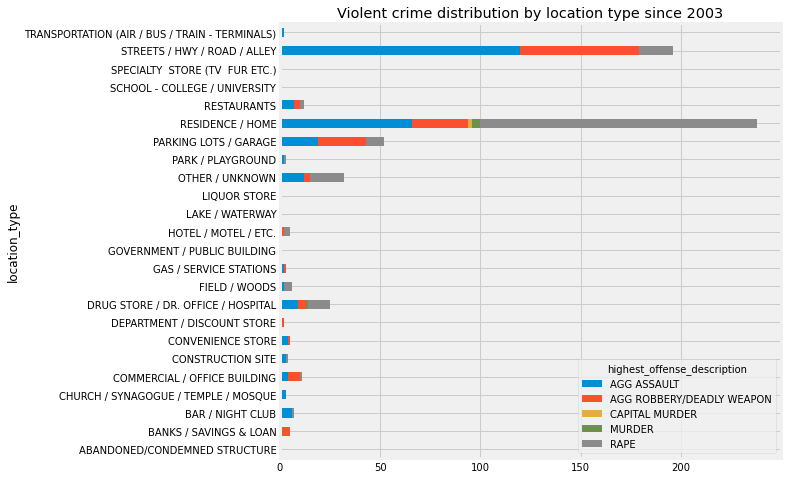

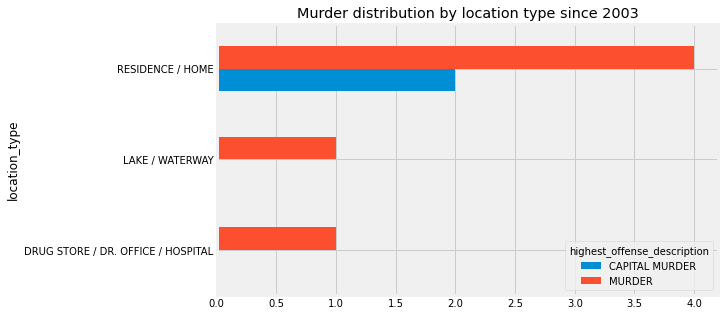

In [9]:
viol_loc = pd.crosstab(df_viol.location_type, df_viol.highest_offense_description)
display(viol_loc)

mur_loc = pd.crosstab(
    df_viol_mur.location_type, df_viol_mur.highest_offense_description
)

viol_loc.plot.barh(
    figsize=(8, 8),
    title="Violent crime distribution by location type since 2003",
    stacked=True,
)
plt.show()

mur_loc.plot.barh(
    figsize=(8, 5), title="Murder distribution by location type since 2003"
)
plt.show()

In [10]:
# Show addresses with 5 or more reported violent crimes
display(df_viol.address.value_counts().head(8))

# Show addresses where murders occurred 
display(df_viol_mur.address.value_counts())

900 BLOCK E 32ND ST          54
919 E 32ND ST                36
2510 LEON ST                  8
600 W 26TH ST                 7
600 BLOCK W 26TH ST           7
1200 BLOCK W 38TH ST          6
2400 BLOCK SAN GABRIEL ST     6
500 BLOCK W 22ND ST           5
Name: address, dtype: int64

900 E 30TH ST          1
3303 LIBERTY ST        1
510 W 26TH ST          1
904 W 21ST ST          1
2529 RIO GRANDE ST     1
3102 1/2 KING ST       1
2812 NUECES ST         1
W 30TH ST / EAST DR    1
Name: address, dtype: int64

INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


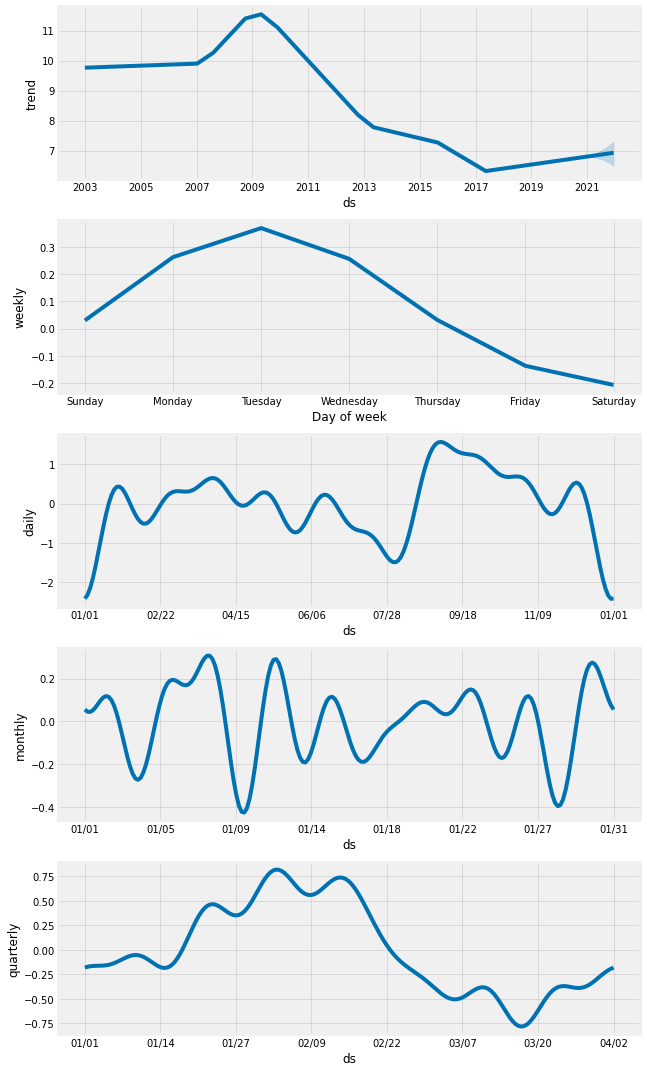

In [11]:
# Facebook Prophet predictions
# Overall crime
df_fbprophet = df

df_m = df_fbprophet.resample("D").size().reset_index()
df_m.columns = ["date", "daily_crime_count"]
df_m_final = df_m.rename(columns={"date": "ds", "daily_crime_count": "y"})

m = Prophet(interval_width=0.95, yearly_seasonality=False)
m.add_seasonality(name="monthly", period=30.5, fourier_order=10)
m.add_seasonality(name="quarterly", period=91.5, fourier_order=10)
m.add_seasonality(name="weekly", period=52, fourier_order=10)
m.add_seasonality(name="daily", period=365, fourier_order=10)
m.fit(df_m_final)

future = m.make_future_dataframe(periods=365, freq="D")
pred = m.predict(future)

fig2 = m.plot_components(pred)
fig2_1 = plot_plotly(m, pred)
fig2_1

INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


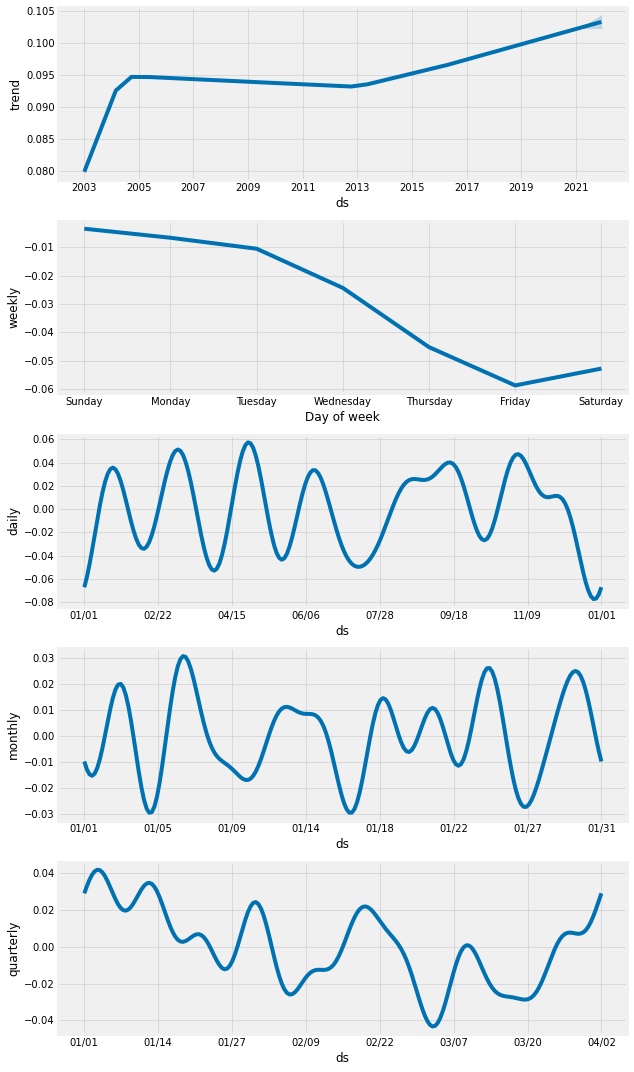

In [12]:
# Violent crime prediction
df_viol_fbprophet = df_viol

df_viol_n = df_viol_fbprophet.resample("D").size().reset_index()
df_viol_n.columns = ["date", "daily_crime_count"]
df_viol_n_final = df_viol_n.rename(columns={"date": "ds", "daily_crime_count": "y"})

n = Prophet(interval_width=0.95, yearly_seasonality=False)
n.add_seasonality(name="monthly", period=30.5, fourier_order=10)
n.add_seasonality(name="quarterly", period=91.5, fourier_order=10)
n.add_seasonality(name="weekly", period=52, fourier_order=10)
n.add_seasonality(name="daily", period=365, fourier_order=10)
n.fit(df_viol_n_final)

future = n.make_future_dataframe(periods=365, freq="D")
pred = n.predict(future)

fig3 = n.plot_components(pred)
fig3_1 = plot_plotly(n, pred)
fig3_1